<a href="https://colab.research.google.com/github/shreyasat27/pennylane-27524/blob/main/Quantum_Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: Transferring Quantum Information
Suppose there are two researchers named Alice and Bob, and Alice wants to send her quantum state to Bob. The quantum teleportation protocol enables Alice to do exactly this in a very elegant manner, and it can be described in four steps:

1. State preparation: Alice initializes her qubit to the state she wishes to teleport.

2. Shared entanglement: A Bell state is created and distributed to Alice and Bob (one qubit each).

3. Change of basis: Alice converts her two qubits from the Bell basis to the computational basis.

4. Measurement: Alice measures her two qubits, then tells Bob how to convert his qubit to obtain the desired state. Note that it is only quantum information being teleported, and not a physical particle.

Problem: The No-Cloning Theorem

Solution: Quantum Teleportation

State Prepration

In [7]:
!pip install pennylane
import pennylane as qml
import numpy as np


def state_preparation(state):
    qml.StatePrep(state, wires=["S"])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 39.0 MB/s eta 0:00:00


Shared entanglement

In [8]:
def entangle_qubits():
    qml.Hadamard(wires="A")
    qml.CNOT(wires=["A", "B"])

Change of basis

In [9]:
def basis_rotation():
    qml.CNOT(wires=["S", "A"])
    qml.Hadamard(wires="S")

Measurement

In [10]:
def measure_and_update():
    m0 = qml.measure("S")
    m1 = qml.measure("A")
    qml.cond(m1, qml.PauliX)("B")
    qml.cond(m0, qml.PauliZ)("B")

We’ve now defined all the building blocks for the quantum teleportation protocol. Let’s put it all together!



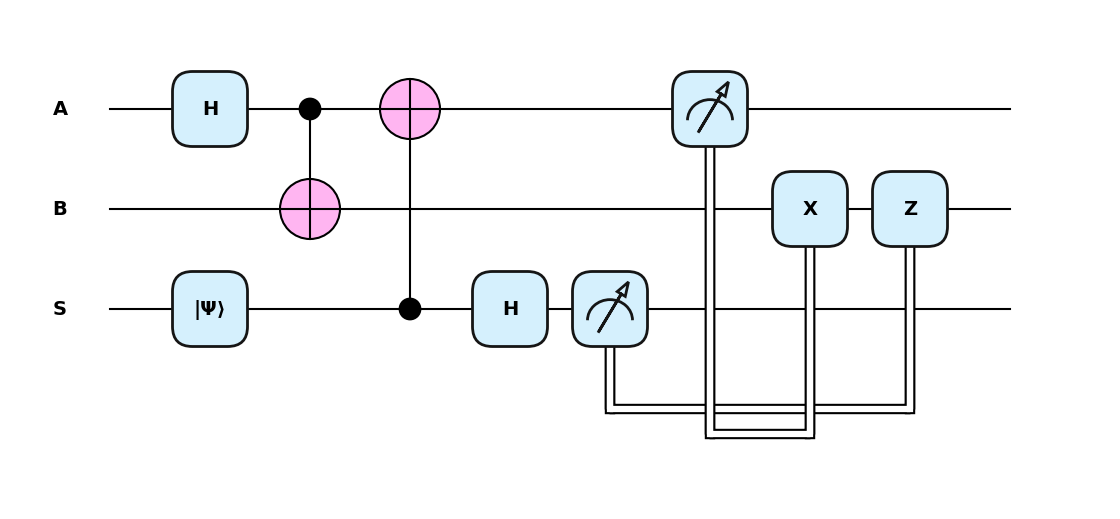

In [11]:
def teleport(state):
    state_preparation(state)
    entangle_qubits()
    basis_rotation()
    measure_and_update()


state = np.array([1 / np.sqrt(2) + 0.3j, 0.4 - 0.5j])
_ = qml.draw_mpl(teleport, style="pennylane")(state)

There is a neat concept known as the principle of deferred measurement, and it basically states that we can push all our measurements to the end of our circuit. This can be useful for a variety of reasons, such as when working in a system that does not support mid-circuit measurements. In PennyLane, when you bind a circuit to a device that does not support them, it will automatically apply the principle of deferred measurement and update your circuit to use controlled operations instead. Note that you need to specify expansion_strategy="device" when calling draw_mpl so it runs the device pre-processing before drawing the circuit.



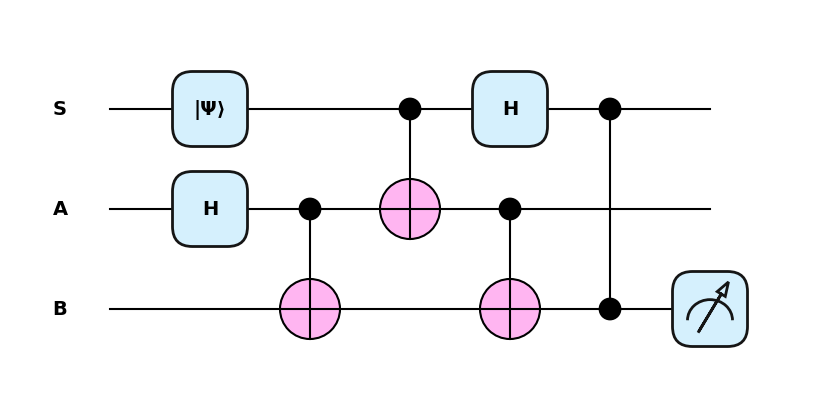

In [12]:
dev = qml.device("default.qubit", wires=["S", "A", "B"])


@qml.qnode(dev)
def teleport(state):
    state_preparation(state)
    entangle_qubits()
    basis_rotation()
    measure_and_update()
    return qml.density_matrix(wires=["B"])


_ = qml.draw_mpl(teleport, style="pennylane", expansion_strategy="device")(state)

We can use qml.density_matrix to trace out and return Bob’s subsystem as a density matrix, which is a more general description of the state of his qubit. We will use this to verify that Alice’s state was successfully teleported to Bob’s qubit.

In [13]:
def teleport_state(state):
    teleported_density_matrix = teleport(state)
    original_density_matrix = qml.math.dm_from_state_vector(state)

    if not np.allclose(teleported_density_matrix, original_density_matrix):
        raise ValueError(
            f"Alice's state ({state}) not teleported properly. "
            f"Final density matrix of Bob's subsystem: {teleported_density_matrix}"
        )
    print("State successfully teleported!")


teleport_state(state)

State successfully teleported!


https://pennylane.ai/_images/teleport_circuit_full_gates.svg